In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 3.1.1 Load image
def load_image(path):
    img = cv2.imread(path)
    if img is not None:
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        raise FileNotFoundError(f"Could not load image from {path}")

# 3.1.2 Convert to grayscale and create binary mask
def create_binary_mask(image, threshold=128):
    grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Create a binary mask: 1 where pixel intensity > threshold, 0 elsewhere
    _, binary_mask = cv2.threshold(grayscale, threshold, 255, cv2.THRESH_BINARY)
    
    # Normalize mask: 0 and 1 (instead of 0 and 255)
    binary_mask = (binary_mask // 255).astype(np.uint8)
    
    return grayscale, binary_mask

# 3.1.3 Extract features and flatten mask
def extract_features_and_labels(grayscale_image, binary_mask):
    # Feature: each pixel intensity (you could extract more features if needed)
    features = grayscale_image.flatten().reshape(-1, 1)  # shape (num_pixels, 1)
    
    # Labels: mask values (0 or 1)
    labels = binary_mask.flatten()  # shape (num_pixels,)
    
    return features, labels

# Example usage
def main():
    try:
        # Load your image
        image_path = "../part2/tulips.png"  # Replace with your image
        image = load_image(image_path)
        
        # Create grayscale and binary mask
        grayscale_img, binary_mask = create_binary_mask(image, threshold=100)  # you can tune the threshold
        
        # Extract features and labels
        features, labels = extract_features_and_labels(grayscale_img, binary_mask)
        
        print(f"Features shape: {features.shape}")
        print(f"Labels shape: {labels.shape}")
        
        # Visualize
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        axs[0].imshow(image)
        axs[0].set_title("Original Image")
        axs[0].axis('off')
        
        axs[1].imshow(grayscale_img, cmap='gray')
        axs[1].set_title("Grayscale Image")
        axs[1].axis('off')
        
        axs[2].imshow(binary_mask, cmap='gray')
        axs[2].set_title("Binary Mask")
        axs[2].axis('off')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")

Features shape: (393216, 1)
Labels shape: (393216,)


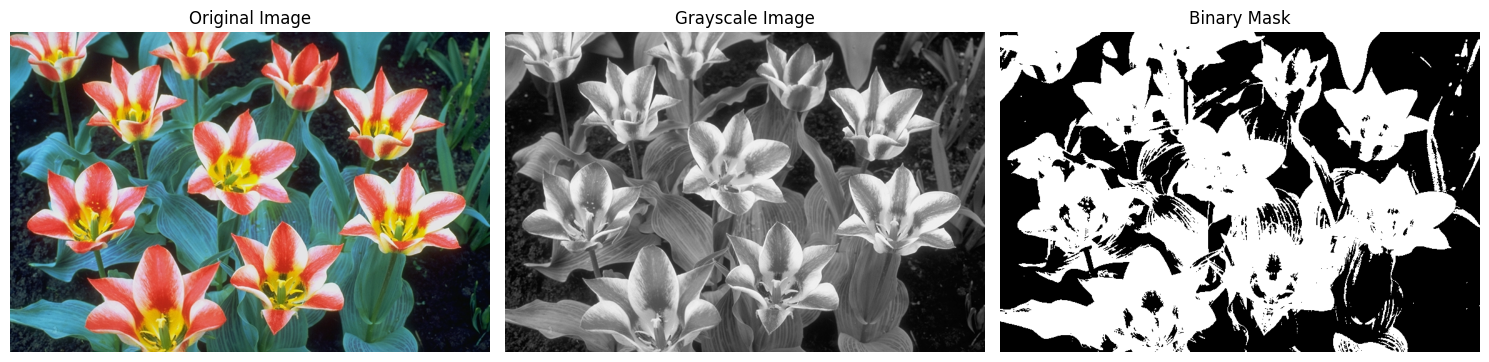

In [4]:
main()